In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('penguins_lter.csv')
dataset

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/2007,39.1,18.7,181,.,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/2007,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/2007,40.3,18.0,.,3250,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/2007,36.7,19.3,193,3450,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/2009,46.8,14.3,215,4850,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/2009,50.4,15.7,222,5750,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/2009,45.2,14.8,212,5200,FEMALE,8.24246,-26.11969,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    object 
 12  Body Mass (g)        342 non-null    object 
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [4]:
dataset['Species'].value_counts()

Species
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64

In [5]:
dataset.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

# pre -prunning

In [6]:
dataset.drop(['studyName' ,  'Sample Number', 'Individual ID' ,'Date Egg',  'Comments'] , axis = 1 , inplace = True)

In [7]:
dataset.isnull().sum()/len(dataset)* 100

Species                0.000000
Region                 0.000000
Island                 0.000000
Stage                  0.000000
Clutch Completion      0.000000
Culmen Length (mm)     0.581395
Culmen Depth (mm)      0.581395
Flipper Length (mm)    0.581395
Body Mass (g)          0.581395
Sex                    2.906977
Delta 15 N (o/oo)      4.069767
Delta 13 C (o/oo)      3.779070
dtype: float64

In [8]:
# Finding the unique values in the given dataset 

for i in dataset.columns:
    print("*"*5 , i , "*" * 5)
    print(set(dataset[i].to_list()))
   
    print()

***** Species *****
{'Adelie Penguin (Pygoscelis adeliae)', 'Chinstrap penguin (Pygoscelis antarctica)', 'Gentoo penguin (Pygoscelis papua)'}

***** Region *****
{'Anvers'}

***** Island *****
{'Dream', 'Biscoe', 'Torgersen'}

***** Stage *****
{'Adult, 1 Egg Stage'}

***** Clutch Completion *****
{'No', 'Yes'}

***** Culmen Length (mm) *****
{49.4, 49.9, 45.7, nan, 50.4, 32.1, 33.1, 33.5, 35.6, 36.2, 35.7, 38.1, 35.2, 40.2, 41.0, 41.5, 34.1, 36.7, 37.8, 38.7, 38.9, 39.5, 40.3, 42.0, 42.5, 46.0, 44.1, 45.8, 46.5, 50.0, 51.3, 52.7, 51.7, 52.0, 58.0, 54.2, 55.8, 59.6, 47.7, 47.2, 44.0, 48.2, 45.0, 50.2, 43.8, 34.6, 34.4, 34.5, 34.0, 35.9, 35.3, 35.0, 35.1, 35.5, 36.6, 36.4, 36.5, 36.0, 36.9, 37.7, 37.9, 37.2, 37.6, 37.0, 38.6, 38.2, 38.8, 37.5, 37.3, 39.1, 39.3, 39.2, 39.8, 39.6, 39.0, 39.7, 40.6, 40.5, 40.9, 41.1, 40.8, 40.1, nan, 41.4, 41.3, 41.6, 41.8, 42.2, 42.3, 42.8, 42.1, 42.9, 43.2, 42.7, 43.1, 43.5, 43.3, 44.5, 44.4, 45.6, 45.4, 45.2, 45.9, 45.5, 46.1, 46.6, 46.4, 46.7, 46.9, 47

In [9]:
dataset["Flipper Length (mm)"].mode()

0    190
Name: Flipper Length (mm), dtype: object

In [10]:
dataset["Flipper Length (mm)"] = np.where(dataset["Flipper Length (mm)"] == "." , '190' , dataset["Flipper Length (mm)"])


In [11]:
dataset["Body Mass (g)"].mode()

0    3800
Name: Body Mass (g), dtype: object

In [12]:
dataset["Body Mass (g)"] = np.where(dataset["Body Mass (g)"] == "." , '3800' , dataset["Body Mass (g)"])


In [13]:
dataset['Sex'].mode()

0    MALE
Name: Sex, dtype: object

In [14]:
dataset['Sex'] = np.where(dataset['Sex'] == "." , 'MALE' , dataset['Sex'])


In [15]:
dataset["Flipper Length (mm)"] = pd.to_numeric(dataset["Flipper Length (mm)"])

In [16]:
dataset["Body Mass (g)"] = pd.to_numeric(dataset["Body Mass (g)"])

In [17]:
dataset.isnull().sum()

Species                 0
Region                  0
Island                  0
Stage                   0
Clutch Completion       0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Region               344 non-null    object 
 2   Island               344 non-null    object 
 3   Stage                344 non-null    object 
 4   Clutch Completion    344 non-null    object 
 5   Culmen Length (mm)   342 non-null    float64
 6   Culmen Depth (mm)    342 non-null    float64
 7   Flipper Length (mm)  342 non-null    float64
 8   Body Mass (g)        342 non-null    float64
 9   Sex                  334 non-null    object 
 10  Delta 15 N (o/oo)    330 non-null    float64
 11  Delta 13 C (o/oo)    331 non-null    float64
dtypes: float64(6), object(6)
memory usage: 32.4+ KB


In [19]:
dataset.columns

Index(['Species', 'Region', 'Island', 'Stage', 'Clutch Completion',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

In [20]:
# 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
#        'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

In [21]:
dataset['Sex'].value_counts()

Sex
MALE      169
FEMALE    165
Name: count, dtype: int64

In [22]:
dataset['Sex'] = dataset['Sex'].fillna('MALE')

In [23]:
#spliting the data into independent and denpendent variable 



In [24]:
numeric = dataset.select_dtypes(include = 'number').columns
char = dataset.select_dtypes(exclude = 'number').columns

In [25]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values= np.nan , strategy = 'median')
dataset[numeric] = impute.fit_transform(dataset[numeric])

In [26]:
dataset.isnull().sum()

Species                0
Region                 0
Island                 0
Stage                  0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

# encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in char:
    dataset[col] = encoder.fit_transform(dataset[col])


In [28]:
dataset

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,0,2,0,1,39.10,18.7,181.0,3800.0,1,8.652405,-25.83352
1,0,0,2,0,1,39.50,17.4,186.0,3800.0,0,8.949560,-24.69454
2,0,0,2,0,1,40.30,18.0,190.0,3250.0,0,8.368210,-25.33302
3,0,0,2,0,1,44.45,17.3,197.0,4050.0,1,8.652405,-25.83352
4,0,0,2,0,1,36.70,19.3,193.0,3450.0,0,8.766510,-25.32426
...,...,...,...,...,...,...,...,...,...,...,...,...
339,2,0,0,0,0,44.45,17.3,197.0,4050.0,1,8.652405,-25.83352
340,2,0,0,0,1,46.80,14.3,215.0,4850.0,0,8.411510,-26.13832
341,2,0,0,0,1,50.40,15.7,222.0,5750.0,1,8.301660,-26.04117
342,2,0,0,0,1,45.20,14.8,212.0,5200.0,0,8.242460,-26.11969


In [29]:
dataset['Species'].value_counts()

Species
0    152
2    124
1     68
Name: count, dtype: int64

In [30]:
dataset.describe()

,Species,Region,Island,Stage,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,344.0,344.000000,344.0,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.918605,0.0,0.662791,0.0,0.895349,43.925000,17.152035,200.877907,4201.017442,0.520349,8.730086,-25.691855
std,0.893320,0.0,0.726194,0.0,0.306549,5.443792,1.969060,14.032539,799.618885,0.500313,0.540630,0.779277
min,0.000000,0.0,0.000000,0.0,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000,7.632200,-27.018540
25%,0.000000,0.0,0.000000,0.0,1.000000,39.275000,15.600000,190.000000,3550.000000,0.000000,8.307415,-26.285460
50%,1.000000,0.0,1.000000,0.0,1.000000,44.450000,17.300000,197.000000,4050.000000,1.000000,8.652405,-25.833520
75%,2.000000,0.0,1.000000,0.0,1.000000,48.500000,18.700000,213.000000,4750.000000,1.000000,9.136170,-25.089467
max,2.000000,0.0,2.000000,0.0,1.000000,59.600000,21.500000,231.000000,6300.000000,1.000000,10.025440,-23.787670


In [31]:
import dtale
dtale.show(dataset)

<Axes: xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

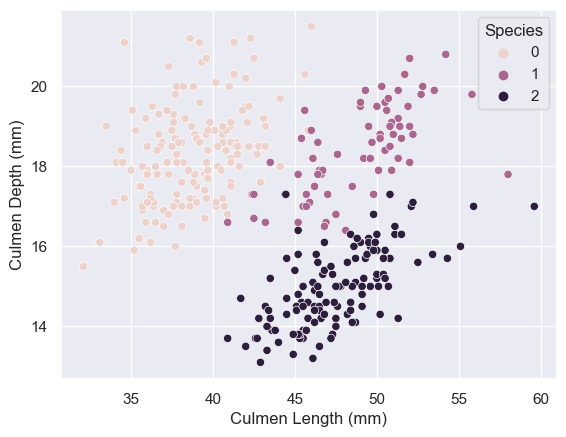

In [32]:
sns.scatterplot(x = 'Culmen Length (mm)' , y = "Culmen Depth (mm)" , data = dataset  , hue = "Species")

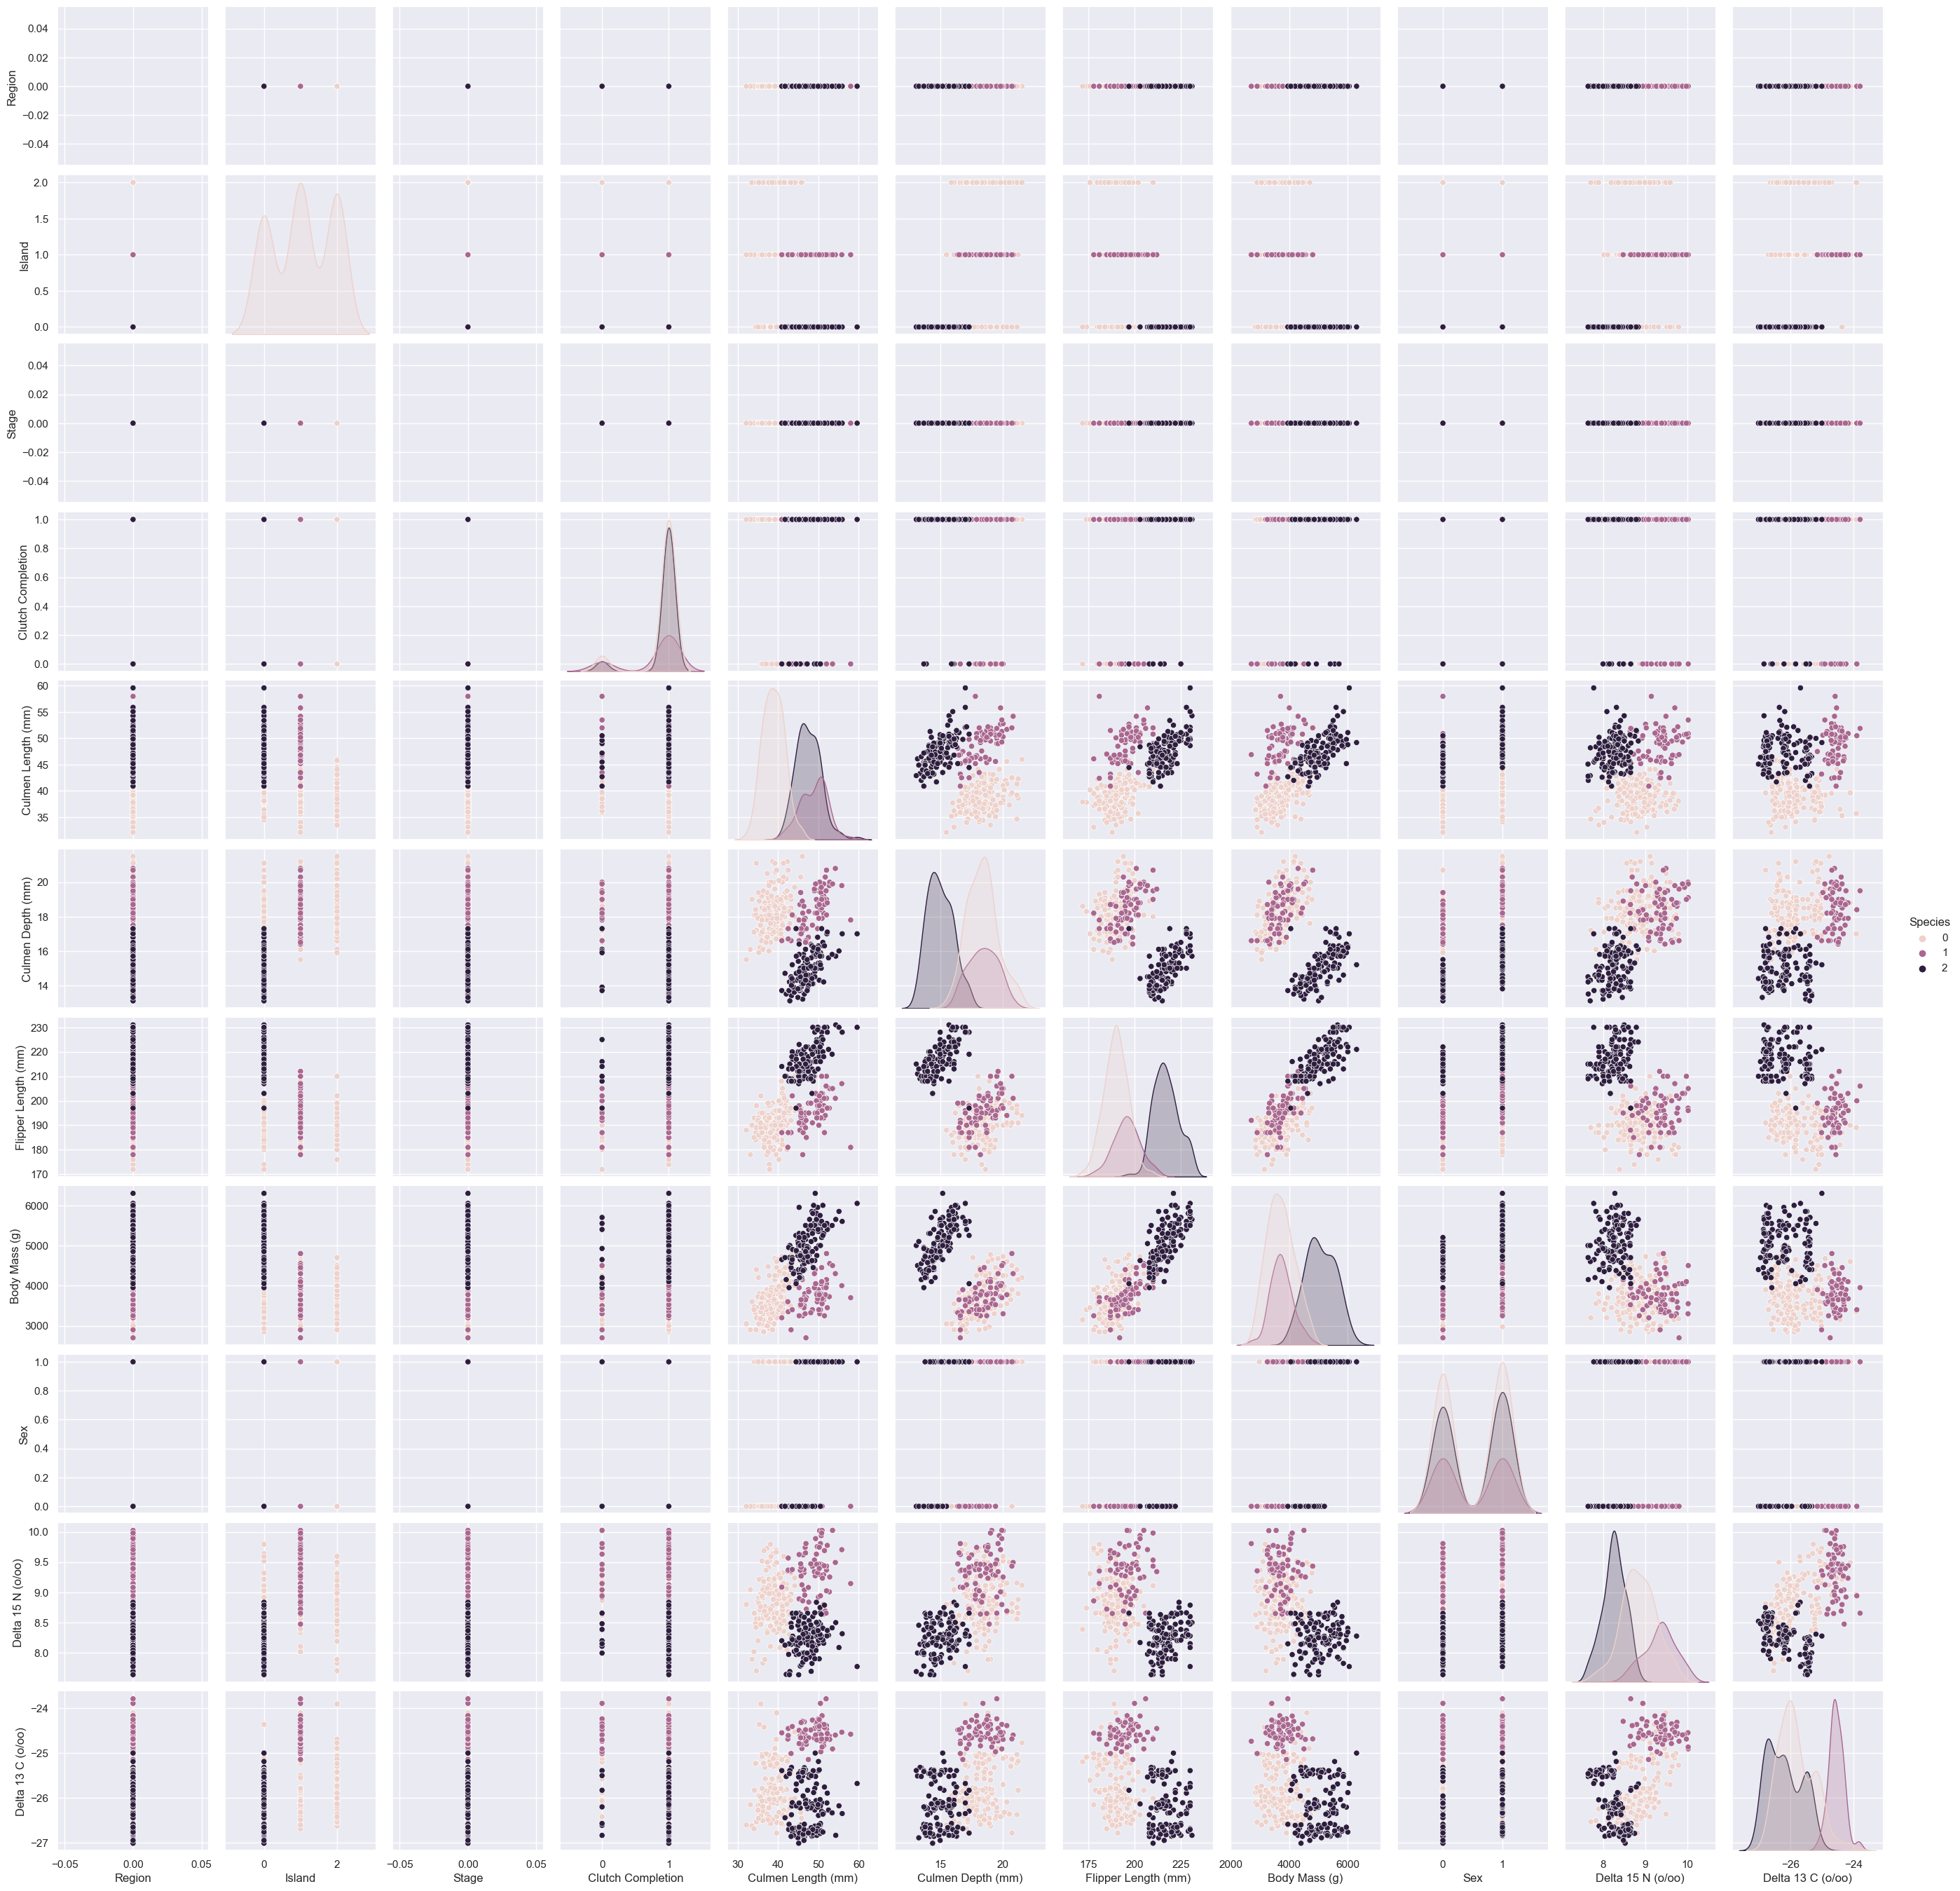

In [33]:
sns.pairplot(data = dataset , hue = "Species")

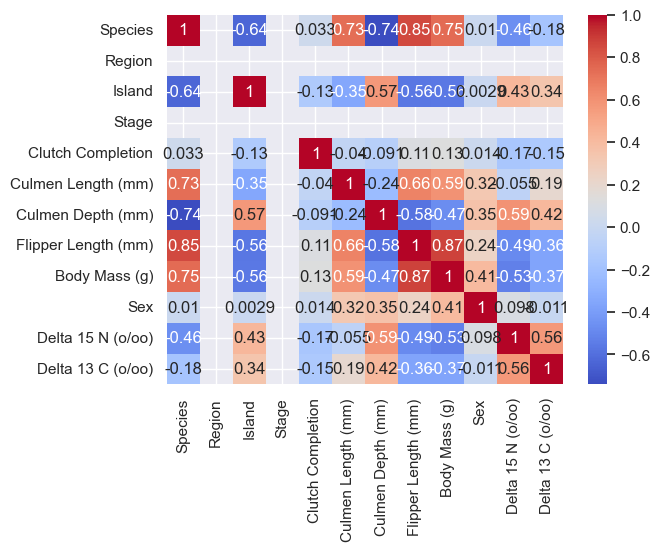

In [34]:
sns.heatmap(dataset.corr() , annot = True , cmap = "coolwarm")
plt.show()

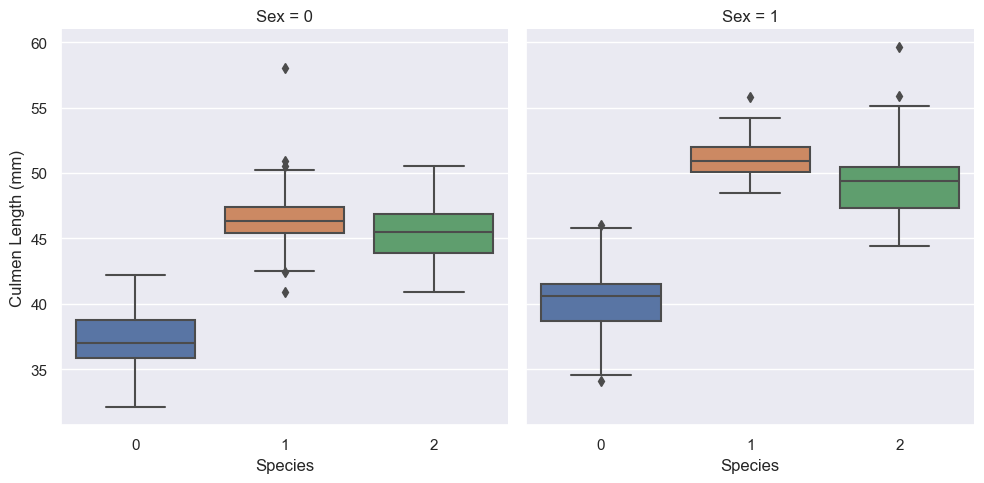

In [35]:
sns.catplot(data =dataset , x = "Species" , y = "Culmen Length (mm)" , kind = 'box' , col = 'Sex') 

In [36]:
x = dataset.iloc[:,1:]

y =  dataset.iloc[:,0]

In [37]:
# imbalance Treatment

import imblearn

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

x_over , y_over = ros.fit_resample(x,y)

print('Befor imbalace : ' , y.value_counts())
print()
print('After imbalace : ' , y_over.value_counts())




Befor imbalace :  Species
0    152
2    124
1     68
Name: count, dtype: int64

After imbalace :  Species
0    152
1    152
2    152
Name: count, dtype: int64


In [41]:
y_over

0      0
1      0
2      0
3      0
4      0
      ..
451    2
452    2
453    2
454    2
455    2
Name: Species, Length: 456, dtype: int32

In [42]:
# spliting data into training and testing fro buliding and prediction purpose
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x_over , y_over , test_size= 0.25 , random_state=23 , stratify= y_over)

# Building Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

dtc1 = DecisionTreeClassifier()
dtc1.fit(x_train , y_train )

dtc2 = DecisionTreeClassifier(criterion='entropy')
dtc2.fit(x_train , y_train )

DecisionTreeClassifier(criterion='entropy')

In [44]:
predict_train_dtc1 = dtc1.predict(x_train)
predict_test_dtc1 = dtc1.predict(x_test)
predict_train_dtc2 = dtc2.predict(x_train)
predict_test_dtc2 = dtc2.predict(x_test)

In [45]:
print("*"*5 , "confusion_matrix" ,"*" * 5)

print("train" , metrics.confusion_matrix(y_train , predict_train_dtc1))

print()

print("test" , metrics.confusion_matrix(y_test , predict_test_dtc1))

***** confusion_matrix *****


NameError: name 'metrics' is not defined

In [ ]:
from sklearn import metrics

print("*"*5 , "classification report","*" * 5)

print("train" , metrics.classification_report(y_train , predict_train_dtc1))

print()

print("test" , metrics.classification_report(y_test , predict_test_dtc1))

In [46]:
print("*"*5 , "accuracy_score","*" * 5)

print("train" , metrics.accuracy_score(y_train , predict_train_dtc1))

print()

print("test" , metrics.accuracy_score(y_test , predict_test_dtc1))

***** accuracy_score *****


NameError: name 'metrics' is not defined

In [ ]:
print("*"*5 , "classification report  entropy ","*" * 5)

print("train" , metrics.classification_report(y_train , predict_train_dtc2))

print()

print("test" , metrics.classification_report(y_test , predict_test_dtc2))

In [47]:
print("*"*5 , "accuracy_score  entropy ","*" * 5)

print("train" , metrics.accuracy_score(y_train , predict_train_dtc2))

print()

print("test" , metrics.accuracy_score(y_test , predict_test_dtc2))

***** accuracy_score  entropy  *****


NameError: name 'metrics' is not defined

In [ ]:
print("*"*5 , "confusion_matrix  entropy ","*" * 5)

print("train" , metrics.confusion_matrix(y_train , predict_train_dtc2))

print()

print("test" , metrics.confusion_matrix(y_test , predict_test_dtc2))

# cross validation

In [48]:
from sklearn.model_selection import cross_val_score

training = cross_val_score(dtc1 , x_train , y_train , cv = 10)
print(training)

print()

print(training.mean())

print()

print(training.max())

[1.         1.         0.97058824 0.91176471 0.97058824 0.94117647
 1.         0.88235294 0.97058824 1.        ]

0.9647058823529411

1.0


In [49]:

# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(dtc1 , x_test , y_test)
# plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

# Post- Prunning

In [ ]:
dtc1.feature_importances_

In [ ]:
pd.DataFrame(index = x.columns , data = dtc1.feature_importances_ , columns = ['Feature Importance'])

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize= (12,8))
plot_tree(dtc1)
plt.show()

In [ ]:

plt.figure(figsize= (12,8))
plot_tree(dtc1 , filled=True , feature_names=x.columns)
plt.show()

In [50]:

# plt.figure(figsize= (12,8))
# plot_tree(dtc2 , filled=True , feature_names=x.columns)
# plt.show()

NameError: name 'plot_tree' is not defined

<Figure size 1200x800 with 0 Axes>

# using Hyperparameter in DTree to Apply Post-Prunning Method

In [51]:
prunned_tree = DecisionTreeClassifier(criterion='gini' , max_depth= 5)
prunned_tree.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=5)

In [59]:
# user defined function 

def report_model(model):
    from sklearn import metrics
    model_preds = model.predict(x_test)
    print(metrics.classification_report(y_test , model_preds))
    print()
    print(metrics.accuracy_score(y_test , model_preds))
    print()
    plt.figure(figsize=(12,8) , dpi = 150)
    #plot_tree(model , filled=True , feature_names= x.columns )

In [60]:
report_model(prunned_tree)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       1.00      0.97      0.99        38
           2       0.97      0.97      0.97        38

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


0.9736842105263158



<Figure size 1800x1200 with 0 Axes>

In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train , y_train )

LogisticRegression()

In [62]:
predict_train_lr = lr.predict(x_train )
predict_test_lr = lr.predict(x_test)

In [64]:
from sklearn import metrics
print("train" , metrics.accuracy_score(y_train , predict_train_lr))

print()

print("test" , metrics.accuracy_score(y_test , predict_test_lr))

train 0.9970760233918129

test 0.9824561403508771


# Bagging Classifier 

In [66]:
from sklearn.ensemble import BaggingClassifier


bagging = BaggingClassifier()
bagging.fit(x_train , y_train)



BaggingClassifier()

In [67]:
predict_train_bagging = bagging.predict(x_train )
predict_test_bagging = bagging.predict(x_test)

In [68]:
from sklearn import metrics
print("train" , metrics.accuracy_score(y_train , predict_train_bagging))

print()

print("test" , metrics.accuracy_score(y_test , predict_test_bagging))

train 1.0

test 0.9824561403508771


# RandomForestClassifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier(criterion='entropy' , n_estimators = 200 , bootstrap= True , oob_score = True)
rfc1.fit(x_train , y_train )



RandomForestClassifier(criterion='entropy', n_estimators=200, oob_score=True)

In [72]:
predict_train_rfc1 = rfc1.predict(x_train )
predict_test_rfc1 = rfc1.predict(x_test)

In [73]:
print("train" , metrics.accuracy_score(y_train , predict_train_rfc1))

print()

print("test" , metrics.accuracy_score(y_test , predict_test_rfc1))

train 1.0

test 0.9824561403508771


In [74]:
training = cross_val_score(rfc1 , x_train , y_train , cv = 10)
print(training)

print()

print(training.mean())

print()

print(training.max())

[1.         1.         0.97058824 0.97058824 0.97058824 1.
 1.         1.         1.         1.        ]

0.9911764705882353

1.0
